# Project 02 - Image Processing

## Student Information

- Full name: Lê Thị Hồng Hạnh
- Student ID: 22127103
- Class: 22CLC07

## Required Libraries

In [87]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Function Definitions

In [89]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''
    img_2d = Image.open(img_path)
    if img_2d.mode != 'RGB':
        img_2d = img_2d.convert('RGB')
    img_2d = np.array(img_2d)
    return img_2d


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image
    '''
    plt.imshow(img)
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image
    img_path : str
        Path of image
    '''
    try:
      img = Image.fromarray(np.uint8(img))
      dot_index = img_path.rfind('.')
      print()
      img.save(img_path, img_path[dot_index+1:])
    except KeyError:
      print('Can not save compressed image. The extension is invalid')
    except IOError:
      print('Can not save compressed image. The path is invalid')


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

def adjust_brightness(img, beta):
    '''
    Adjust brightness of image

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image
    beta : int
        Brightness adjustment value

    Returns
    -------
        New image with adjusted brightness
    '''
    new_img = np.clip(img.astype(int) + beta, 0, 255)
    return new_img

def adjust_contrast(img, alpha):
    '''
    Adjust contrast of image

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image
    alpha : int
        Contrast adjustment value

    Returns
    -------
        New image with adjusted brightness
    '''
    new_img = np.clip(img.astype(float) * alpha, 0, 255)
    return new_img.astype(int)

def flip_horizontal(img):
    '''
    Flip image horizontally

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New flipped horizontally image with
    '''
    new_img = np.fliplr(img)
    return new_img

def flip_vertical(img):
    '''
    Flip image horizontally

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New flipped vertically image
    '''
    new_img = np.flipud(img)
    return new_img

def RGB_to_grayscale(img):
    '''
    Convert RGB image to grayscale

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New grayscale image
    '''
    temp = img.astype(float)
    new_img = [[(0.3*col[0] + 0.59 * col[1] + 0.11 * col[2], 0.3*col[0] + 0.59 * col[1] + 0.11 * col[2], 0.3*col[0] + 0.59 * col[1] + 0.11 * col[2]) for col in row] for row in temp]
    new_img = np.array(new_img)
    new_img = new_img.astype(int)
    return new_img

def RGB_to_sepia(img):
    '''
    Convert RGB image to sepia

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New sepia image
    '''
    temp = img.astype(float)
    new_img = [[(0.393*col[0] + 0.769*col[1] + 0.189*col[2], 0.349*col[0] + 0.686*col[1] + 0.168*col[2], 0.272*col[0] + 0.534*col[1] + 0.131*col[2])for col in row]for row in temp]
    new_img = np.array(new_img)
    new_img = np.clip(new_img, 0, 255)
    new_img = new_img.astype(int)
    return new_img

gaussian_kernel_3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype = float) / 16
gaussian_kernel_5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]], dtype=float) / 256
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=float)

def blur(img):
    '''
    Blur image

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New blurred image
    '''
    kernel = np.array(gaussian_kernel_5)
    padding_weight = kernel.shape[0] // 2
    padding_img = np.zeros((img.shape[0] + 2*padding_weight, img.shape[1] + 2*padding_weight, img.shape[2]), dtype=int)
    padding_img[padding_weight:padding_weight+img.shape[0], padding_weight:padding_weight+img.shape[1], :] = img
    new_img = np.zeros(img.shape)
    for i in range(0, img.shape[0]):
      for j in range(0, img.shape[1]):
        new_img[i,j,:] = np.sum(padding_img[i:i+kernel.shape[0], j:j+kernel.shape[1], :] * kernel[:,:,np.newaxis], axis=(0,1))
    new_img = np.clip(new_img.astype(int), 0, 255)
    return new_img

def sharpen(img):
    '''
    Sharpen image

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New sharpened image
    '''
    kernel = np.array(sharpen_kernel)
    padding_weight = kernel.shape[0] // 2
    padding_img = np.zeros((img.shape[0] + 2*padding_weight, img.shape[1] + 2*padding_weight, img.shape[2]))
    padding_img[padding_weight:padding_weight+img.shape[0], padding_weight:padding_weight+img.shape[1], :] = img.astype(float)
    new_img = np.zeros(img.shape)
    for i in range(0, img.shape[0]):
      for j in range(0, img.shape[1]):
        new_img[i,j,:] = np.sum(padding_img[i:i+kernel.shape[0], j:j+kernel.shape[1], :] * kernel[:,:,np.newaxis], axis=(0,1))
    new_img = np.clip(new_img.astype(int), 0, 255)
    return new_img



def crop_center(img, crop_size):
    '''
    Crop image to center

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image
    crop_size : tuple(int, int)
        Crop size with new width and new height

    Returns
    -------
        New image with cropped
    '''
    start_row = (img.shape[0] - crop_size[0]) / 2
    start_col = (img.shape[1] - crop_size[1]) / 2
    end_row = start_row + crop_size[0]
    end_col = start_col + crop_size[1]
    new_img = img[int(start_row):int(end_row), int(start_col):int(end_col), :]
    return new_img

def crop_circle(img):
    '''
    Crop image to circular

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New image with cropped
    '''
    center = (int(img.shape[0] // 2), int(img.shape[1] // 2))
    radius = min(img.shape[:2]) / 2
    mask = np.zeros(img.shape[:2], dtype=bool)
    y, x = np.ogrid[:img.shape[0], :img.shape[1]]
    mask = (y - center[0])**2 + (x - center[1])**2 <= radius**2
    new_img = img.copy()
    new_img[~mask] = 0
    return new_img

def crop_ellipse(img):
    '''
    Crop image to elliptical

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image

    Returns
    -------
        New image with cropped
    '''
    center = (int(img.shape[0] // 2), int(img.shape[1] // 2))
    side = min(img.shape[:2])
    a_pow_2 = (0.75*side**2)/2.0
    b_pow_2 = (0.25*side**2)/2.0
    angle_1 = np.pi/4
    angle_2 = 3*np.pi/4
    mask_1 = np.zeros(img.shape[:2], dtype=bool)
    mask_2 = np.zeros(img.shape[:2], dtype=bool)
    y, x = np.ogrid[:img.shape[0], :img.shape[1]]
    mask_1 = ((y-center[0])*np.cos(angle_1) - (x-center[1])*np.sin(angle_1))**2 / a_pow_2 + ((y-center[0])*np.sin(angle_1) + (x-center[1])*np.cos(angle_1))**2 / b_pow_2 <= 1
    mask_2 = ((y-center[0])*np.cos(angle_2) - (x-center[1])*np.sin(angle_2))**2 / a_pow_2 + ((y-center[0])*np.sin(angle_2) + (x-center[1])*np.cos(angle_2))**2 / b_pow_2 <= 1
    mask = np.logical_or(mask_1, mask_2)
    new_img = img.copy()
    new_img[~mask] = 0
    return new_img

def zoom(img, factor):
    '''
    Zoom image

    Parameters
    ----------
    img : np.ndarray with shape=(height, width, num_channels)
        Image
    factor : float
        Zoom factor

    Returns
    -------
        New zoomed image
    '''
    new_img = np.zeros((int(img.shape[0]*factor), int(img.shape[1]*factor), img.shape[2]), dtype=int)
    for i in range(new_img.shape[0]):
      for j in range(new_img.shape[1]):
        new_img[i, j, :] = img[int(i/factor), int(j/factor), :]
    return new_img

def create_new_img_path(old_img_path, option):
    '''
    Create new image path

    Parameters
    ----------
    old_img_path : str
        Old image path
    option : str
        Option of new image path

    Returns
    -------
        New image path
    '''
    dot_index = old_img_path.rfind('.')
    new_img_path = old_img_path[:dot_index] + '_' + option + old_img_path[dot_index:]
    return new_img_path


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [100]:
# YOUR CODE HERE

## Main function

In [90]:
# YOUR CODE HERE
def main():
    options = ['All', 'Adjust brightness', 'Adjust contrast', 'Flip', 'Convert to grayscale/sepia', 'Blur/Shapern', 'Crop in center', 'Crop in circle/ellipse frame', 'Zoom in/out 2x']
    img_path = input('Enter img_path:')
    img = read_img(img_path)
    for i in range(len(options)):
      print(f'{i}. {options[i]}')
    choice = int(input('Enter your choice: '))
    if choice == 0 or choice == 1:
      print('Adjust brightness')
      beta = int(input('Enter beta(int):'))
      new_img = adjust_brightness(img, beta)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'brightness'))
    if choice == 0 or choice == 2:
      print('Adjust contrast')
      alpha = float(input('Enter alpha(float):'))
      new_img = adjust_contrast(img, alpha)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'contrast'))
    if choice == 0 or choice == 3:
      print('Flip horizontally')
      new_img = flip_horizontal(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'flip_horizontal'))
      print('Flip vertically')
      new_img = flip_vertical(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'flip_vertical'))
    if choice == 0 or choice == 4:
      print('Grayscale')
      new_img = RGB_to_grayscale(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'grayscale'))
      print('Sepia')
      new_img = RGB_to_sepia(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'sepia'))
    if choice == 0 or choice == 5:
      print('Blur')
      new_img = blur(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'blur'))
      print('Sharpen')
      new_img = sharpen(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'sharpen'))
    if choice == 0 or choice == 6:
      print('Crop center')
      new_height = int(input('Enter new height(int): '))
      new_width = int(input('Enter new width(int): '))
      new_img = crop_center(img, (new_height, new_width))
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'crop'))
    if choice == 0 or choice == 7:
      print('Circle')
      new_img = crop_circle(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'circle'))
      print('Ellipse')
      new_img = crop_ellipse(img)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'ellipse'))
    if choice == 0 or choice == 8:
      print('Zoom in 2x')
      new_img = zoom(img, 2)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'zoomin'))
      print('Zoom out 2x')
      new_img = zoom(img, 0.5)
      show_img(new_img)
      save_img(new_img, create_new_img_path(img_path, 'zoomout'))

Enter img_path:/content/Lenna.png
0. All
1. Adjust brightness
2. Adjust contrast
3. Flip
4. Convert to grayscale/sepia
5. Blur/Shapern
6. Crop in center
7. Crop in circle/ellipse frame
8. Zoom in/out 2x
Enter your choice: 0
Adjust brightness
Enter beta(int):100


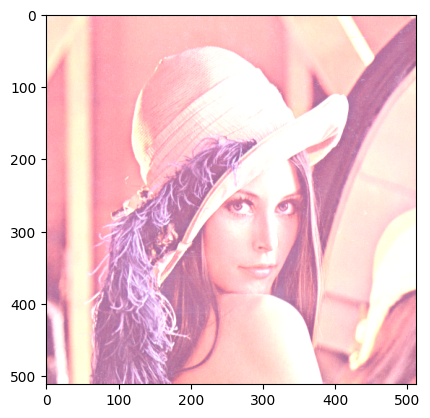

Adjust contrast
Enter alpha(float):2.2


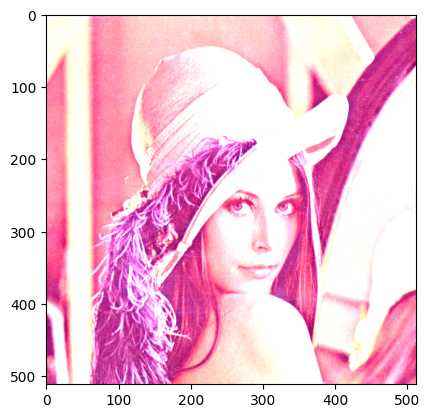

Flip horizontally


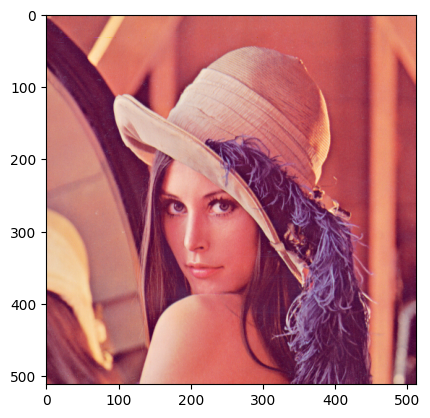

Flip vertically


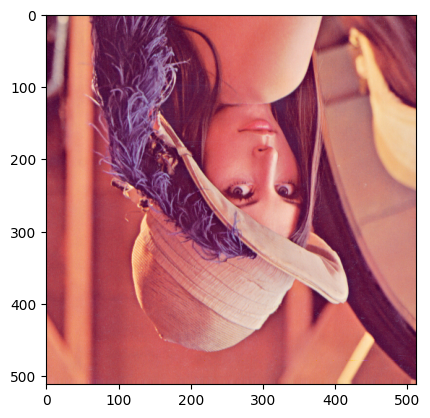

Grayscale


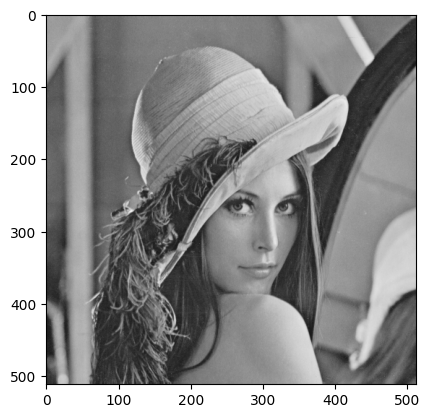

Sepia


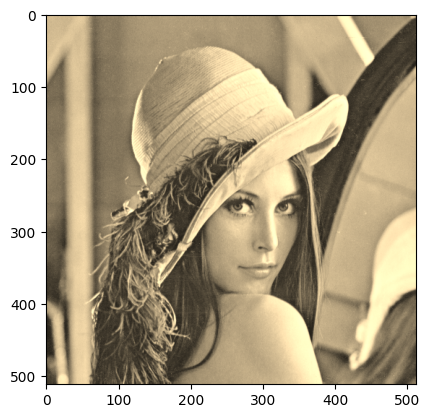

Blur


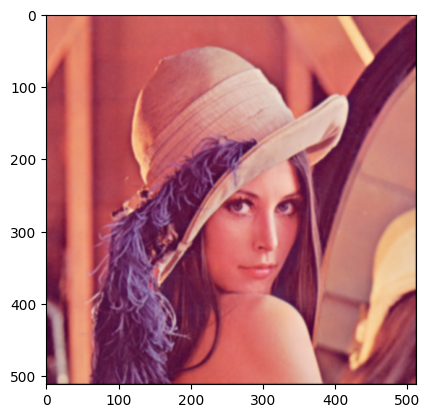

Sharpen


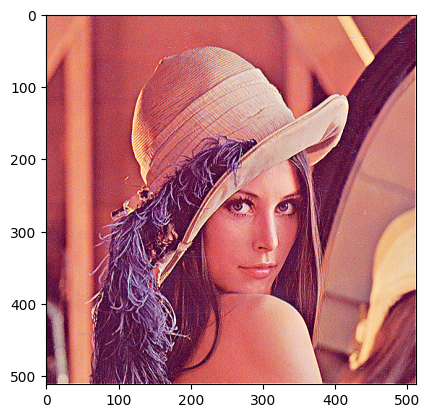

Crop center
Enter new height(int): 250
Enter new width(int): 300


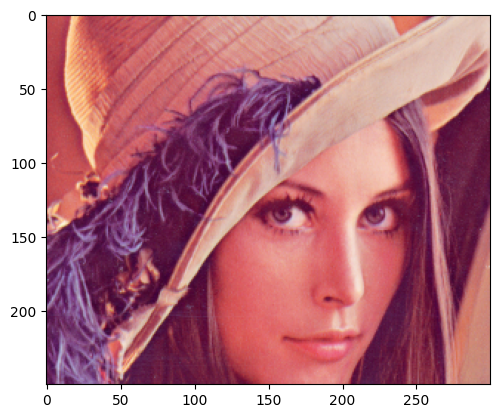

Circle


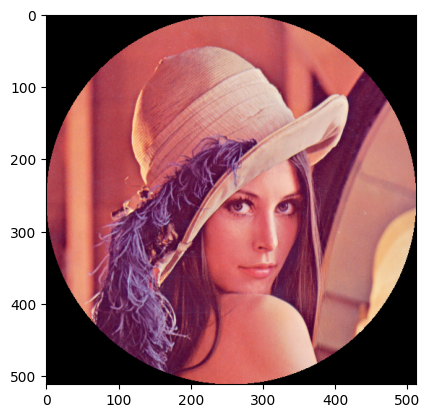

Ellipse


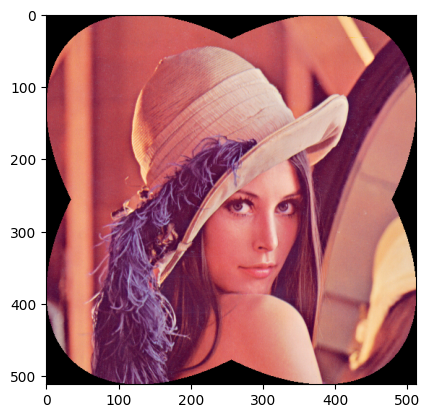

Zoom in 2x


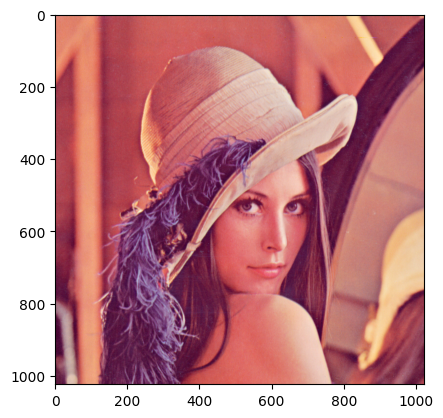

Zoom out 2x


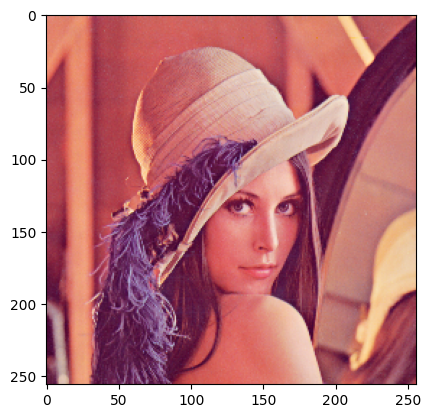

In [99]:
# Call main function
main()